# Importing the data

In [1]:
from time import time
import random
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('sentiment.csv', encoding = "ISO-8859-1", header=None)
df_raw.columns = ["label", "time", "date", "query", "username", "text"]
df_raw.head()

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df_raw['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [4]:
df = df_raw[['label', 'text']]
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
#Seperating positive and negative labels to get balanced data
df_pos = df[df['label'] == 4]
df_neg = df[df['label'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [6]:
#Retaining 1/4th data from both groups
df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

200000 200000


In [7]:
#Concatenating both groups into single dataframe
df = pd.concat([df_pos, df_neg])
len(df)

400000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 800000 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   400000 non-null  int64 
 1   text    400000 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.2+ MB


In [9]:
df.head()

,label,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [10]:
df.describe()

,label
count,400000.000000
mean,2.000000
std,2.000003
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,4.000000


# Cleaning and processing the data

# a. Tokenization

In [11]:
#pip install nltk

In [12]:
start_time = time()

from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer(reduce_len=True)

data = []

# Separating text and labels into two lists
X = df['text'].tolist()
Y = df['label'].tolist()

# Building data list, where each tuple is a pair of the tokenized text and its corresponding label
for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))
        
print('CPU Time:', time() - start_time)
data[:5]

CPU Time: 26.334860801696777


[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1),
 (['Being',
   'sick',
   'can',
   'be',
   'really',
   'cheap',
   'when',
   'it',
   'hurts',
   'too',
   'much',
   'to',
   'eat',
   'real',
   'food',
   'Plus',
   ',',
   'your',
   'friends',
   'make',
   'you',
   'soup'],
  1),
 (['@LovesBrooklyn2', 'he', 'has', 'that', 'effect', 'on', 'everyone'], 1)]

# b. Lemmatization

In [13]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

print(pos_tag(data[0][0]))

[('I', 'PRP'), ('LOVE', 'VBP'), ('@Health4UandPets', 'NNS'), ('u', 'JJ'), ('guys', 'NNS'), ('r', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('!', '.'), ('!', '.')]


In [14]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        # Converting pos_tag output tags to a tag format that WordNetLemmatizer can interpret
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(data[0][0]))

['I', 'LOVE', '@Health4UandPets', 'u', 'guy', 'r', 'the', 'best', '!', '!']


# c. Cleaning

In [15]:
import re, string
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

# cleaning input text
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token


def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Removing if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Remving if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        # Removing if its length is less than 3, if it is a punctuation or if it is a stopword
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

print(remove_noise(data[0][0]))

['love', 'guy', 'best']


In [16]:
start_time = time()

# Transforming data into a dict-like structure for Naive Bayesian Classifier
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

final_data[:5]

Removed Noise, CPU Time: 191.97434997558594
Data Prepared for model, CPU Time: 1.0772509574890137


[({'love': True, 'guy': True, 'best': True}, 1),
 ({'meet': True,
   'one': True,
   'besties': True,
   'tonight': True,
   'cant': True,
   'wait': True,
   'girl': True,
   'talk': True},
  1),
 ({'thanks': True,
   'twitter': True,
   'add': True,
   'sunisa': True,
   'get': True,
   'meet': True,
   'hin': True,
   'show': True,
   'area': True,
   'sweetheart': True},
  1),
 ({'sick': True,
   'really': True,
   'cheap': True,
   'hurt': True,
   'much': True,
   'eat': True,
   'real': True,
   'food': True,
   'plus': True,
   'friend': True,
   'make': True,
   'soup': True},
  1),
 ({'effect': True, 'everyone': True}, 1)]

# Visualizing the data

In [18]:
#pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Positive words


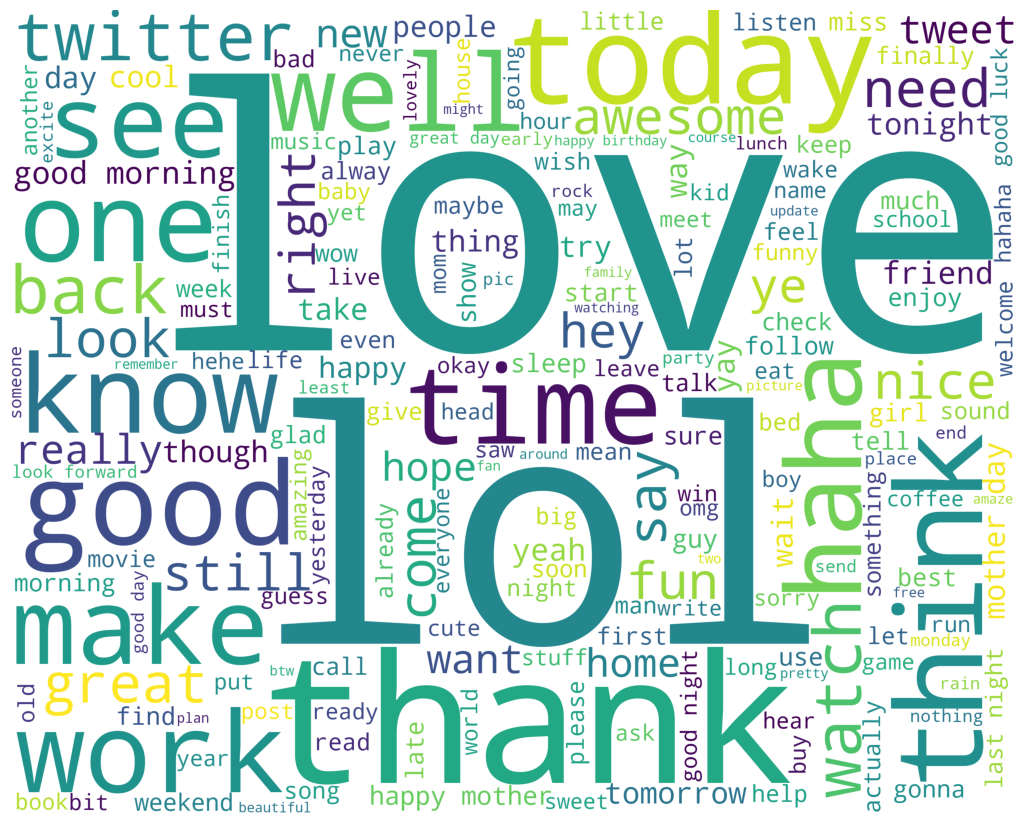

Negative words


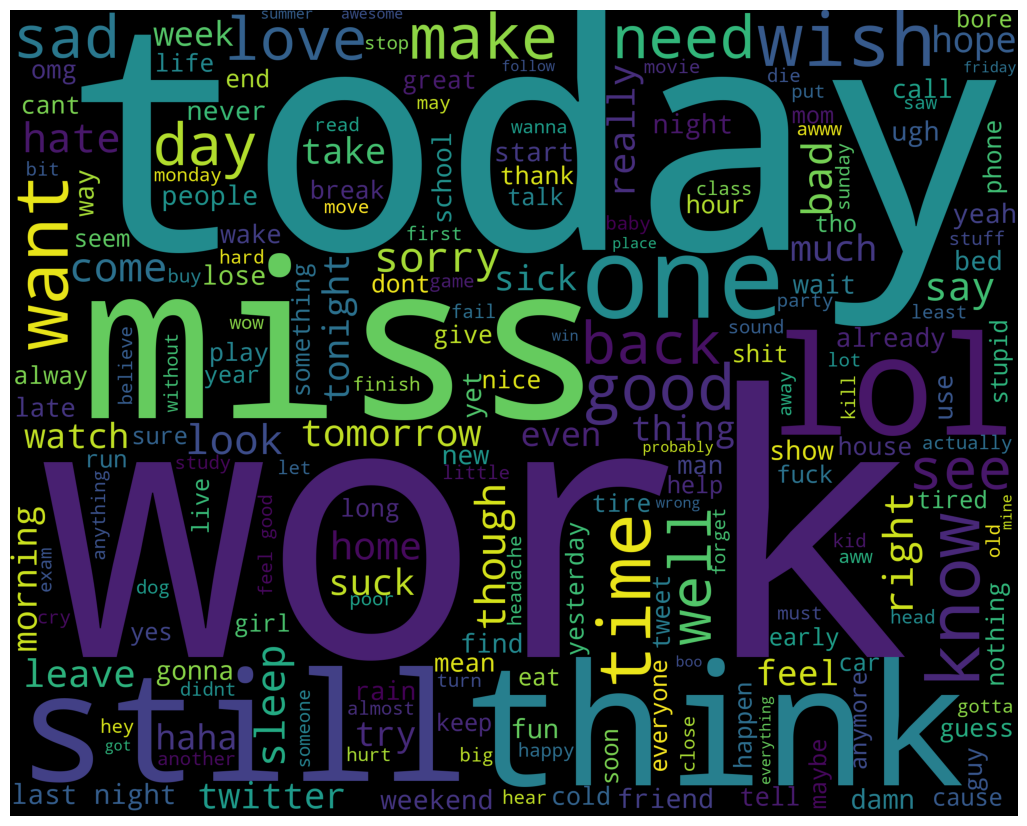

CPU Time: 24.23031497001648


In [19]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []

# Separating positive and negative words
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)        

print('CPU Time:', time() - start_time)

# Naive Bayesian Model

In [20]:
# Shuffling the data as it is ordered by label
random.Random(140).shuffle(final_data)

trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [21]:
start_time = time()

from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

# Printing words that are heavily present in one sentiment group and very rarely present in the other
print(classifier.show_most_informative_features(20))

print('\nCPU Time:', time() - start_time)

Accuracy on train data: 0.8107305555555555
Accuracy on test data: 0.755575
Most Informative Features
               depressed = True                0 : 1      =     49.0 : 1.0
               toothache = True                0 : 1      =     45.0 : 1.0
                    roni = True                0 : 1      =     34.3 : 1.0
                 unhappy = True                0 : 1      =     31.4 : 1.0
                   strep = True                0 : 1      =     31.0 : 1.0
                  asthma = True                0 : 1      =     26.3 : 1.0
                 unloved = True                0 : 1      =     25.0 : 1.0
                  #movie = True                1 : 0      =     23.0 : 1.0
                  gutted = True                0 : 1      =     22.3 : 1.0
                   hates = True                0 : 1      =     21.9 : 1.0
               heartburn = True                0 : 1      =     21.7 : 1.0
                     bom = True                1 : 0      =     21.4 : 1.0

There is a high volume of negative to positive informative features. It means that negative tweets have limited and common vocabulary in comparison to positive tweets.

It could be interpreted as when people are in bad mood, they are restricted to a limited and less creative vocabulary, as compared to when they are in happy mood.

# Testing the data

In [22]:
custom_tweet = "I ordered just once from Amazon, they screwed up, never used the app again."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))


0


In [23]:
custom_tweet = "I loved the show today! It was amazing."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [24]:
custom_tweet = "No idea"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


The model only evaluates sentences at an independent word level and performs very poorly when it comes to negations and other multi-words constructs.

In [25]:
custom_tweet = "Good"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [26]:
custom_tweet = "Not good"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


Also, the model isn't robust against sarcastic sentences.

In [27]:
custom_tweet = "The reward for good work is more work!"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


The model does not generalize well.

The model would perform greatly on data similar to the data it trained on.  However, for the words it never encountered before, it would be unable to properly classify it, and would simply output a random choice.

In [28]:
from sklearn import metrics

y = [test_data[i][1] for i in range(len(test_data))]
probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

print(len(y), len(probs))

fpr, tpr, thresholds = metrics.roc_curve(y, probs)

auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

40000 40000
AUC: 0.834


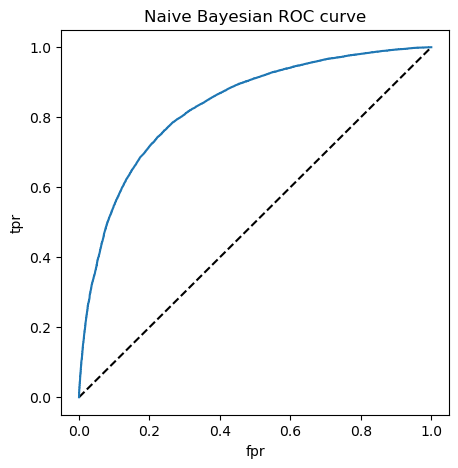

In [29]:
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [30]:
probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,16529,3451,19980
1,6326,13694,20020
All,22855,17145,40000


# Deep Learning Model - LSTM

# a. Word Embeddings using GloVe

In [31]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [32]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [33]:
# Loading the 50-dimensional GloVe embeddings
# This method will return three dictionaries:
# * word_to_index: a dictionary mapping from words to their indices in the vocabulary
# * index_to_word: dictionary mapping from indices to their corresponding words in the vocabulary
# * word_to_vec_map: dictionary mapping words to their GloVe vector representation
# Note that there are 400,001 words, with the valid indices ranging from 0 to 400,000

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [34]:
word_to_index['hello']

176468

In [35]:
word_to_vec_map['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

As this word embedding only considers 400,000 unique words, it might encounter words it has never seen before. 

In order to overcome such scenarios, word embeddings reserve an extra spot for "unknown" words, also denoted with the keyword unk.

In [36]:
word_to_index['unk']

372306

# b. Data Transformation

In [40]:
start_time = time()

unks = []
UNKS = []

# To eliminate contiguously occuring instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

   
print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 0.0015189647674560547
max_len: 25
Data Prepared for model, CPU Time: 1.1383109092712402
[[226278. 169725.  74390.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [239785. 269953. 372306. 361859.  91041. 382320. 161844. 352214.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [357161. 368306.  46173. 372306. 160418. 239785. 179025. 329974.  58999.
  349437.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [330826. 302352.  97698. 184322. 251645. 132701. 302292. 151204. 286963.
  154049. 231458. 338210.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [133896. 141948.      0.      0.      0.      0.      0.  

# c. Building Model

In [41]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split

In [42]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [43]:
# Defining a sequential model composed of embedding layer, a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates output between 0 and 1

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

2022-12-01 23:06:46.810551: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-01 23:06:46.812929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            20000050  
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [44]:
# Compiling model with a binary cross-entropy loss function, using the default adam optimizer
# and setting accurary as the metric to track

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [46]:
len(X_train)

320000

In [47]:
len(X_test)

80000

# d. Training the model

In [48]:
# Setting a batch size of 20 and training model for 20 epochs

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

2022-12-01 23:08:21.616816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
2500/2500 [==============================] - 346s 137ms/step - loss: 0.5815 - accuracy: 0.6880 - val_loss: 0.5149 - val_accuracy: 0.7404
Epoch 2/20
2500/2500 [==============================] - 350s 140ms/step - loss: 0.5120 - accuracy: 0.7436 - val_loss: 0.5008 - val_accuracy: 0.7516
Epoch 3/20
2500/2500 [==============================] - 342s 137ms/step - loss: 0.4874 - accuracy: 0.7607 - val_loss: 0.4846 - val_accuracy: 0.7625
Epoch 4/20
2500/2500 [==============================] - 343s 137ms/step - loss: 0.4694 - accuracy: 0.7712 - val_loss: 0.4797 - val_accuracy: 0.7664
Epoch 5/20
2500/2500 [==============================] - 369s 147ms/step - loss: 0.4492 - accuracy: 0.7833 - val_loss: 0.4809 - val_accuracy: 0.7675
Epoch 6/20
2500/2500 [==============================] - 351s 140ms/step - loss: 0.4277 - accuracy: 0.7976 - val_loss: 0.4902 - val_accuracy: 0.7630
Epoch 7/20
2500/2500 [==============================] - 355s 142ms/step - loss: 0.4013 - accuracy: 0.8111 - val_

In [49]:
# function in order to plot various models accuracy and loss progress

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

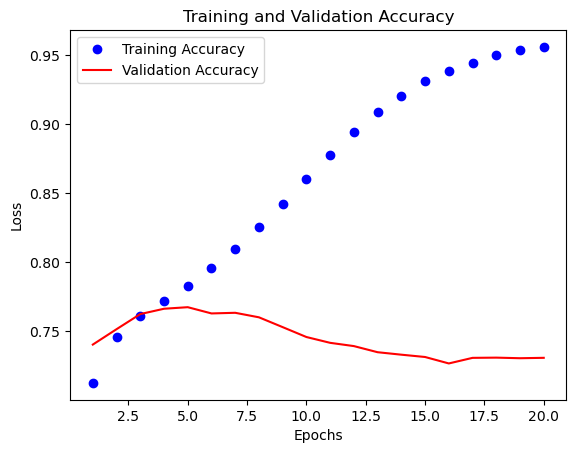

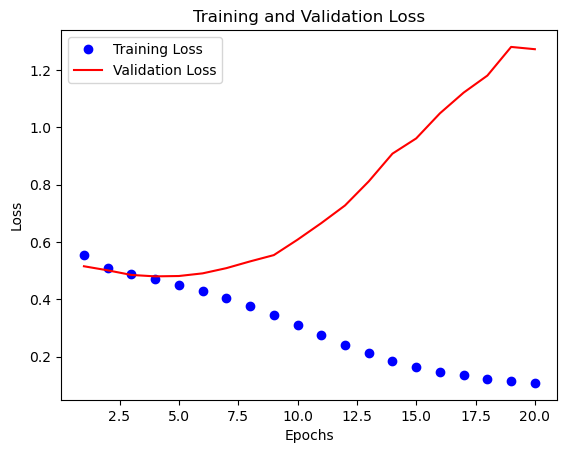

In [50]:
plot_acc_loss(model.history)

The training accuracy is exceeding 95% after 20 epochs! However, the validation accuracy increased slightly in the early epochs, reaching 76.6% on the 6th epoch, after which it experienced a consistently gradual decrease. The model is over-fitting the data.


# Possibilities to improve model

# 1. Regularization - Dropout

# a. Model Building - Dropout

In [52]:
keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            20000050  
_________________________________________________________________
dropout (Dropout)            (None, 25, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           183296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
______________________________________

In [53]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# b. Model Training - Dropout

In [54]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
2500/2500 [==============================] - 350s 139ms/step - loss: 0.6171 - accuracy: 0.6539 - val_loss: 0.5379 - val_accuracy: 0.7272
Epoch 2/20
2500/2500 [==============================] - 349s 140ms/step - loss: 0.5671 - accuracy: 0.7001 - val_loss: 0.5180 - val_accuracy: 0.7395
Epoch 3/20
2500/2500 [==============================] - 350s 140ms/step - loss: 0.5520 - accuracy: 0.7110 - val_loss: 0.5096 - val_accuracy: 0.7457
Epoch 4/20
2500/2500 [==============================] - 357s 143ms/step - loss: 0.5418 - accuracy: 0.7194 - val_loss: 0.5021 - val_accuracy: 0.7506
Epoch 5/20
2500/2500 [==============================] - 359s 144ms/step - loss: 0.5339 - accuracy: 0.7260 - val_loss: 0.4972 - val_accuracy: 0.7545
Epoch 6/20
2500/2500 [==============================] - 353s 141ms/step - loss: 0.5281 - accuracy: 0.7299 - val_loss: 0.4942 - val_accuracy: 0.7569
Epoch 7/20
2500/2500 [==============================] - 352s 141ms/step - loss: 0.5233 - accuracy: 0.7339 - val_

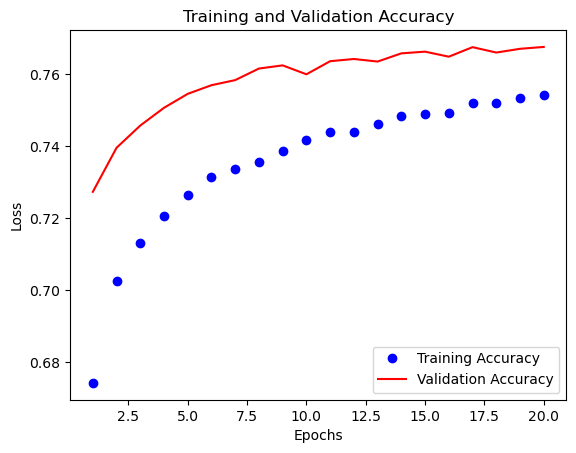

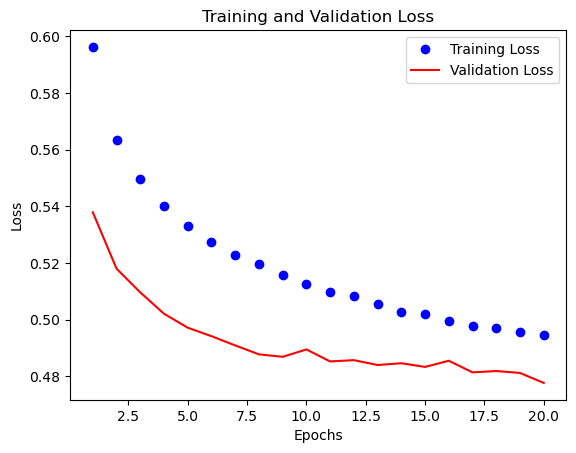

In [55]:
plot_acc_loss(model_dropout.history)

The training accuracy is progressing at a much slower pace than it previously did. The validation accuracy is steadily increasing, reaching 76.7%.

Training the model for 20 more epochs.

In [56]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
2500/2500 [==============================] - 347s 139ms/step - loss: 0.4923 - accuracy: 0.7550 - val_loss: 0.4806 - val_accuracy: 0.7670
Epoch 2/20
2500/2500 [==============================] - 347s 139ms/step - loss: 0.4915 - accuracy: 0.7558 - val_loss: 0.4802 - val_accuracy: 0.7678
Epoch 3/20
2500/2500 [==============================] - 347s 139ms/step - loss: 0.4910 - accuracy: 0.7561 - val_loss: 0.4771 - val_accuracy: 0.7681
Epoch 4/20
2500/2500 [==============================] - 354s 141ms/step - loss: 0.4898 - accuracy: 0.7565 - val_loss: 0.4789 - val_accuracy: 0.7685
Epoch 5/20
2500/2500 [==============================] - 347s 139ms/step - loss: 0.4885 - accuracy: 0.7586 - val_loss: 0.4787 - val_accuracy: 0.7679
Epoch 6/20
2500/2500 [==============================] - 354s 142ms/step - loss: 0.4878 - accuracy: 0.7581 - val_loss: 0.4826 - val_accuracy: 0.7668
Epoch 7/20
2500/2500 [==============================] - 12155s 5s/step - loss: 0.4875 - accuracy: 0.7589 - val_l

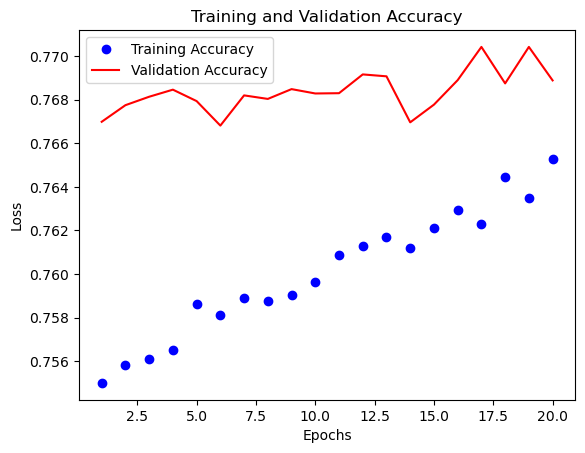

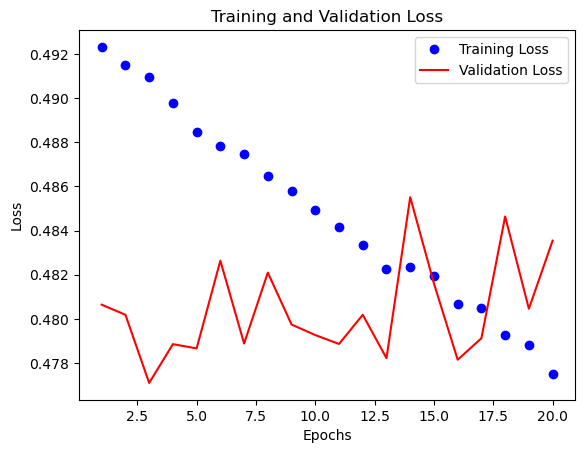

In [57]:
plot_acc_loss(model_dropout.history)

The accuracy has plateaued, reaching its best validation value of 77.1%.
The regularization process did not really help. A tiny 0.5% improvement was observed after adding dropout to the model.

# 2. Inspecting the Data - Unknown Words

Counting the number of words that are being flagged as unknowns in our data.

In [58]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1
n_unk_words


198378

In [59]:
len(unks)

198378

In [60]:
len(UNKS)

226552

The above defined function sentence_to_indices helped us reduce the number of unknown words by 28,000.

In [61]:
from collections import Counter
Counter(unks).most_common(50)

[("i'm", 32149),
 ("can't", 11370),
 ("i'l", 6284),
 ("that's", 5478),
 ("i've", 5085),
 ("he's", 1976),
 ("mother's", 1878),
 ("i'd", 1855),
 ('hahaha', 1723),
 ("we're", 1578),
 ("there's", 1425),
 ("what's", 1356),
 ("they're", 1179),
 ('lmao', 1104),
 ("we'l", 914),
 ("let's", 802),
 ('bday', 618),
 ('. .', 600),
 ('idk', 588),
 ("it'l", 587),
 ('hahah', 486),
 ('. . .', 481),
 ("how's", 440),
 ("who's", 378),
 ('#fb', 358),
 ('hahahaha', 356),
 ("mom's", 333),
 ('#asot40', 333),
 (":'(", 327),
 ("ain't", 317),
 ("y'al", 313),
 ("we've", 312),
 ('tweps', 312),
 (';-)', 307),
 ('thanx', 290),
 ('coky', 289),
 ('#folowfriday', 266),
 ("today's", 264),
 ('hehehe', 259),
 ('awh', 259),
 ("here's", 256),
 ("where's", 239),
 ('2morow', 235),
 ('urgh', 216),
 ('ahaha', 211),
 ("he'l", 197),
 ('b-day', 193),
 ('tomorow', 191),
 ("they'l", 191),
 ("ya'l", 187)]

# Further data cleaning

In [62]:
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow' or token == '2moro':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if token == "mother's":
        return "mother"
    if token == "mom's":
        return "mom"
    if token == "dad's":
        return "dad"
    if token == 'bday' or token == 'b-day':
        return 'birthday'
    if token in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't",
                 "doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return token.replace("'", "")
    if token in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if token == '<3':
        return 'love'
    if token == 'thanx' or token == 'thnx':
        return 'thanks'
    if token == 'goood':
        return 'good'
    if token in ['amp', 'quot', 'lt', 'gt', '½25', '..', '. .', '. . .']:
        return ''
    return token


def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token in tweet_tokens:
        # Eliminating the token if it is a link
        token = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        cleaned_token = cleaned(token.lower())
        
        if cleaned_token == "idk":
            cleaned_tokens.append('i')
            cleaned_tokens.append('dont')
            cleaned_tokens.append('know')
            continue
        if cleaned_token == "i'll":
            cleaned_tokens.append('i')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "you'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "we'll":
            cleaned_tokens.append('we')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it'll":
            cleaned_tokens.append('it')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it's":
            cleaned_tokens.append('it')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i've":
            cleaned_tokens.append('i')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you've":
            cleaned_tokens.append('you')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "we've":
            cleaned_tokens.append('we')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "they've":
            cleaned_tokens.append('they')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you're":
            cleaned_tokens.append('you')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "we're":
            cleaned_tokens.append('we')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "they're":
            cleaned_tokens.append('they')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "let's":
            cleaned_tokens.append('let')
            cleaned_tokens.append('us')
            continue
        if cleaned_token == "she's":
            cleaned_tokens.append('she')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "he's":
            cleaned_tokens.append('he')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "that's":
            cleaned_tokens.append('that')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i'd":
            cleaned_tokens.append('i')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "you'd":
            cleaned_tokens.append('you')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "there's":
            cleaned_tokens.append('there')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "what's":
            cleaned_tokens.append('what')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "how's":
            cleaned_tokens.append('how')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "who's":
            cleaned_tokens.append('who')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "y'all" or cleaned_token == "ya'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('all')
            continue

        if cleaned_token.strip() and cleaned_token not in string.punctuation: 
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

print(remove_noise(data[0][0]))

['i', 'love', 'you', 'guys', 'are', 'the', 'best']


In [63]:
start_time = time()

unks = []
UNKS = []

def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index


cleaned_tokens_list = []


for tokens, label in data:
    x = remove_noise(tokens)
    if x:
        cleaned_tokens_list.append((x, label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 17.25049591064453
max_len: 79
Data Prepared for model, CPU Time: 2.0071969032287598
[[185457. 226278. 394475. 169754.  58997. 357266.  74390.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.]
 [187631. 239792. 373317. 388711. 269953. 268046. 254258. 372306. 361859.
   91041. 382320. 161844. 352214.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0. 

In [64]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

119802

In [65]:
from collections import Counter
Counter(unks).most_common(50)

[(':/', 688),
 ('(:', 451),
 ('shouldnt', 429),
 ('. .', 397),
 ('#fb', 358),
 ('#asot40', 333),
 (":'(", 327),
 ('tweps', 312),
 (';-)', 307),
 ('->', 288),
 ('iï', 278),
 ('#folowfriday', 266),
 ("today's", 264),
 ('d:', 261),
 ('hehehe', 259),
 ('awh', 259),
 ("weren't", 257),
 ("here's", 256),
 ("where's", 239),
 ('2morow', 235),
 ('urgh', 216),
 ('ahaha', 211),
 ("he'l", 197),
 ('tomorow', 191),
 ("they'l", 191),
 ('8:', 189),
 ('sux', 184),
 ('hadnt', 178),
 ('tmrw', 177),
 ('bleh', 174),
 ('retwet', 173),
 ('yey', 171),
 ('probs', 169),
 ('<-', 167),
 ('#delongeday', 167),
 ('theyve', 164),
 ('twiterverse', 160),
 ('awsome', 150),
 ("friend's", 148),
 ('lï', 146),
 ('itï', 142),
 ('cï', 139),
 ("everyone's", 138),
 ("g'night", 137),
 ('twiterland', 137),
 ('damnit', 137),
 ('omfg', 136),
 ("she'l", 135),
 ('=/', 134),
 ('proly', 134)]

# Model Training - Cleaner Data

In [66]:
keras.backend.clear_session()

model_clean_data = Sequential()

model_clean_data.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_clean_data.add(Dense(units=1, activation='sigmoid'))

model_clean_data.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 79, 50)            20000050  
_________________________________________________________________
bidirectional (Bidirectional (None, 79, 256)           183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [67]:
model_clean_data.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [69]:
len(X_train)

319360

In [70]:
len(X_test)

79841

In [71]:
model_clean_data.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
2495/2495 [==============================] - 1077s 431ms/step - loss: 0.5608 - accuracy: 0.7056 - val_loss: 0.4696 - val_accuracy: 0.7739
Epoch 2/20
2495/2495 [==============================] - 1076s 431ms/step - loss: 0.4626 - accuracy: 0.7795 - val_loss: 0.4396 - val_accuracy: 0.7934
Epoch 3/20
2495/2495 [==============================] - 1332s 534ms/step - loss: 0.4281 - accuracy: 0.8012 - val_loss: 0.4330 - val_accuracy: 0.7987
Epoch 4/20
2495/2495 [==============================] - 1082s 434ms/step - loss: 0.4042 - accuracy: 0.8146 - val_loss: 0.4187 - val_accuracy: 0.8055
Epoch 5/20
2495/2495 [==============================] - 1110s 445ms/step - loss: 0.3818 - accuracy: 0.8271 - val_loss: 0.4166 - val_accuracy: 0.8085
Epoch 6/20
2495/2495 [==============================] - 1102s 442ms/step - loss: 0.3557 - accuracy: 0.8414 - val_loss: 0.4229 - val_accuracy: 0.8056
Epoch 7/20
2495/2495 [==============================] - 1114s 446ms/step - loss: 0.3286 - accuracy: 0.8550

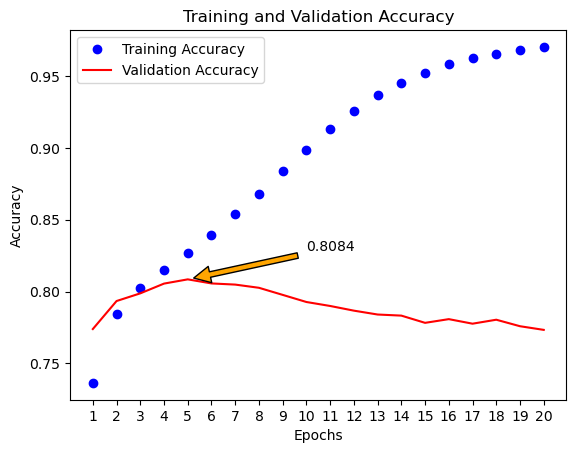

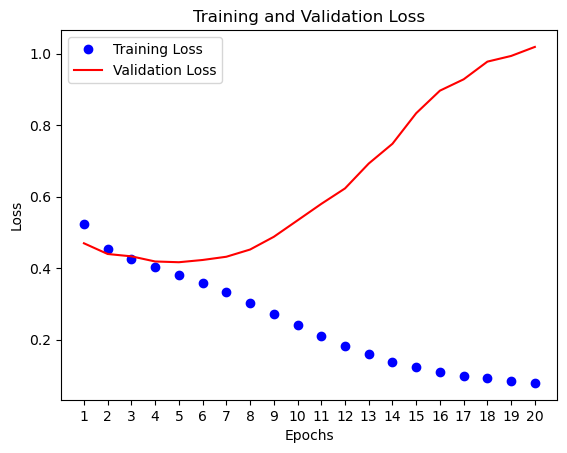

In [72]:
history = model_clean_data.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
y_arrow = max(val_acc)
x_arrow = val_acc.index(y_arrow) + 1
plt.annotate(str(y_arrow)[:6],
             (x_arrow, y_arrow),
             xytext=(x_arrow + 5, y_arrow + .02),
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.xticks(epochs)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
plt.show()

The model managed to reach 81% validation accuracy on the 6th epoch!

# Predicting on Custom Data

This model will return values between 0 and 1, representing it’s confidence on whether a tweet holds a negative or a positive sentiment. The closer the value is to 0, the more confident the model is that this tweet is negative. The closer the value is to 1, the more confident the model is that this tweet is negative.

In [73]:
def sentence_to_indices(sentence_words, max_len):
    X = np.zeros((max_len))
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
        X[j] = index
    return X

def predict_custom_tweet_sentiment(custom_tweet):
    x_input = sentence_to_indices(remove_noise(tk.tokenize(custom_tweet)), max_len)
    
    
    return model_clean_data.predict(np.array([x_input])).item()

In [74]:
predict_custom_tweet_sentiment("I'm happy you're here!")

1.0

In [75]:
predict_custom_tweet_sentiment("I'm not happy you're here!")

4.628090664482443e-06

In [76]:
predict_custom_tweet_sentiment("I disliked his attitude...")

0.0022062957286834717

In [77]:
predict_custom_tweet_sentiment("I'm infatuated with you")

0.7147030830383301

In [78]:
(negative_words + positive_words).count('love')

17636

In [79]:
(negative_words + positive_words).count('infatuated')

0

# Inspecting Wrongly Predicted Data

In [80]:
def i_to_sentence(I):
    sentence = ""
    for i in I:
        if i:
            sentence += index_to_word[int(i)] + " "
        else:
            break
    return sentence

In [81]:
C = 0

pred = model_clean_data.predict(X_test)

for i in range(len(X_test)):
    final_pred = 1 if pred[i] > 0.5 else 0
    
    if(final_pred != Y_test[i]):
        print('Expected sentiment: ' + str(int(Y_test[i])) + '. Input: ' + i_to_sentence(X_test[i]))
        C += 1
        
    if C > 100:
        break

Expected sentiment: 1. Input: rusty is back 
Expected sentiment: 0. Input: you sure i can if you want to because i want to and lol fish fish it actually really healthy silly its good for you so eat 
Expected sentiment: 0. Input: still have evil cold very annoying tom has given me a haircut to cheer me up though 
Expected sentiment: 1. Input: in bristol museum being silly the best pic of me being alfred the gorilla 
Expected sentiment: 0. Input: i can understand ... sorry for making you talk about it cherish the positive memories 
Expected sentiment: 0. Input: unk you get tht from 
Expected sentiment: 1. Input: it is working for me 
Expected sentiment: 1. Input: acha aisa hai kya i hope you live upto the expectation of the person who made the remark without any effort 
Expected sentiment: 1. Input: just waking up i have final exams this week not excited to take them but excited to be done 
Expected sentiment: 0. Input: cool thanks shd check apple ones but i still unk find a maemo unk pl

Some examples seem wrongly labeled in the first place, whereas some other examples are really hard to classify without further context.